In [7]:
import pandas as pd
import xlrd
import numpy as np
from pandas import DataFrame
from pandas import Series

In [8]:
data1=pd.read_excel(r"C:\Users\wangc\Desktop\行业 万得全A数据.xlsx",sheet_name="Sheet1")
data2=pd.read_excel(r"C:\Users\wangc\Desktop\行业 万得全A数据.xlsx",sheet_name="Sheet2")
data3=pd.read_excel(r"C:\Users\wangc\Desktop\行业 万得全A数据.xlsx",sheet_name="传媒")
data4=pd.read_excel(r"C:\Users\wangc\Desktop\行业 万得全A数据.xlsx",sheet_name="全A")

In [9]:
#print (data3)
#print (data4)
total=data4['Amount']
commu=data3['Amount']*10**6
percent=commu/total
price=data3['ClosePrice']
times=data3['TradeDate']
index=data4['Close']
trend=price/index
#print (percent)      #check output
arpercent=np.array(percent)
arprice=np.array(price)
#print (arpercent)    #check output

#计算相关系数
def calc_corr1(a, b):
    s1 = Series(a)
    s2 = Series(b)
    return s1.corr(s2)

print('R=',"%.3f" % calc_corr1(arpercent, arprice))

R= 0.443


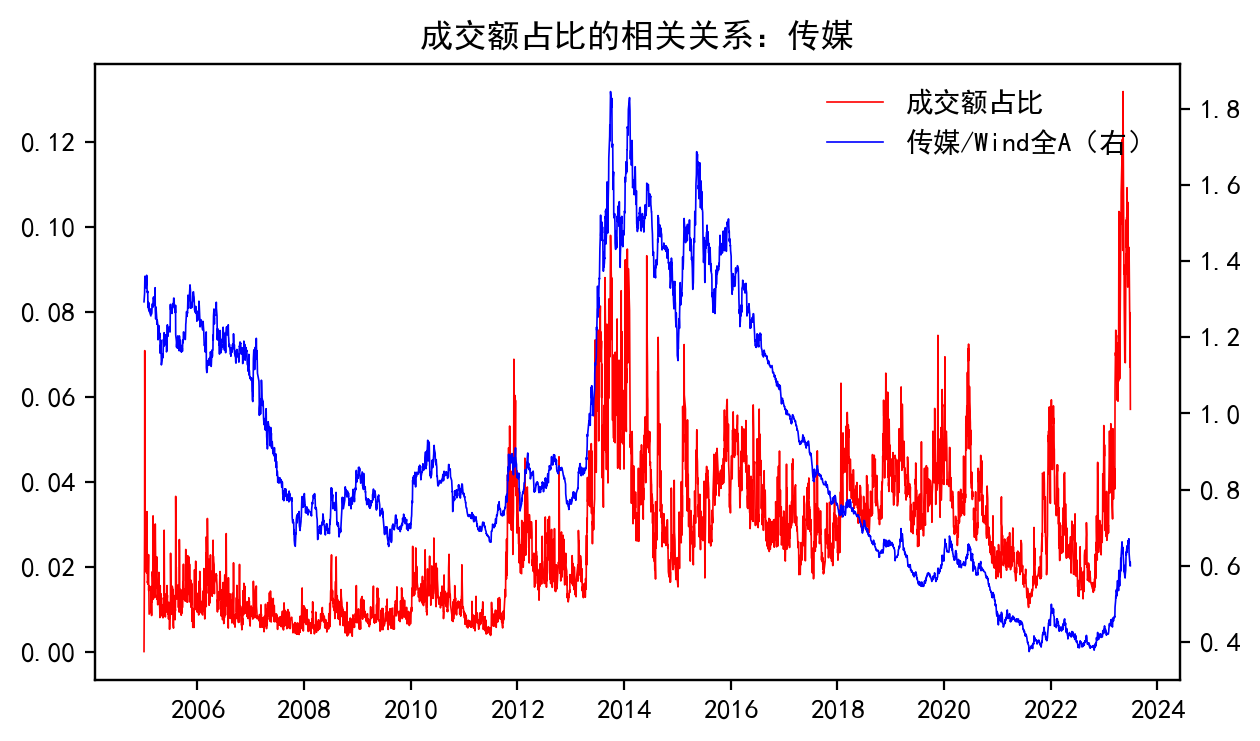

In [10]:
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
fig=plt.figure(figsize=(7,4),dpi=200)        
ax1=fig.add_subplot(111)                     
line1,=ax1.plot(times,percent,'r',lw=0.6,label='成交额占比')    
ax2=ax1.twinx()                           
line2,=ax2.plot(times,trend,'b',lw=0.6,label='传媒/Wind全A')
plt.legend((line1,line2),('成交额占比','传媒/Wind全A（右）'),frameon=False,framealpha=0.5)       
#ax1.set_xlabel('时间')                # 设置x轴
#ax1.set_ylabel('%')                   # 设置左侧y轴
#ax2.set_ylabel('%')                  # 设置右侧y轴
plt.title("成交额占比的相关关系：传媒")                    # 设置图的名称
#plt.savefig('传媒.png')                                   # 保存输出图片
plt.show()

In [11]:
#计算抄底胜率
#抄底胜率定义为若当期为滚动半年成交额占比底部，未来 1 个月收益为正的概率
t = 0
rate=[]
timetake=[]
def find_min_in_future(arpercent, future_window=125):
    min_items = []
    for i in range(len(arpercent) - future_window):
        current_item = arpercent[i]
        future_items = arpercent[i:i + future_window]
        if current_item == min(future_items):
            min_items.append(i)

    return min_items

result = find_min_in_future(arpercent, future_window=125)

#print(result)  # check output

for j in range(len(result)):
    countnum = result[j]
    rate.append(arpercent[countnum])
    timetake.append(times[countnum])
    testprice = arprice[countnum]
    if countnum + 20 < len(arprice):
        compareprice = arprice[countnum + 20]
        if testprice < compareprice:
            t += 1

winrate = t / len(result) * 100
#print (t)
#print (len(result))
print('抄底胜率：',"%.1f" % winrate, '%')


抄底胜率： 70.2 %


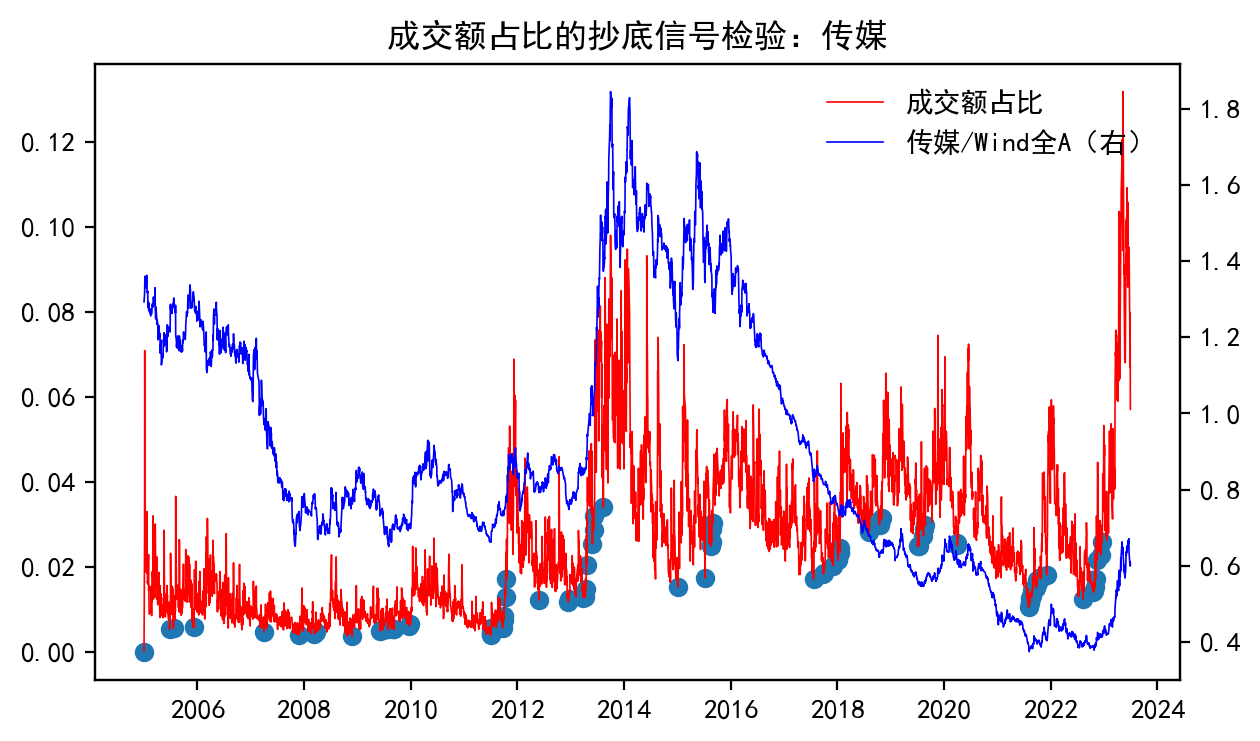

In [12]:
# 抄底示意图
fig=plt.figure(figsize=(7,4),dpi=200)        
ax1=fig.add_subplot(111)                     
line1,=ax1.plot(times,percent,'r',lw=0.6,label='成交额占比') 
plt.scatter(timetake, rate, s=None, c=None, marker=None, cmap=None)
ax2=ax1.twinx()                           
line2,=ax2.plot(times,trend,'b',lw=0.6,label='传媒/Wind全A')
plt.legend((line1,line2),('成交额占比','传媒/Wind全A（右）'),frameon=False,framealpha=0.5)       
#ax1.set_xlabel('时间')                # 设置x轴
#ax1.set_ylabel('%')                   # 设置左侧y轴
#ax2.set_ylabel('%')                  # 设置右侧y轴
plt.title("成交额占比的抄底信号检验：传媒")                    # 设置图的名称
#plt.savefig('传媒-抄底.png')                                   # 保存输出图片
plt.show()

In [13]:
#计算逃顶胜率
#逃顶胜率定义为若当期为滚动半年成交额占比顶部，未来 1 个月收益为负的概率
tmax = 0
ratemax=[]
timetake_max=[]

def find_max_in_future(arpercent, future_window=125):
    max_items = []
    for imax in range(len(arpercent) - future_window):
        current_item_max = arpercent[imax]
        future_items_max = arpercent[imax:imax + future_window]
        if current_item_max == max(future_items_max):
            max_items.append(imax)

    return max_items

result_max = find_max_in_future(arpercent, future_window=125)

#print(result_max)  # check output

for jmax in range(len(result_max)):
    countnum_max = result_max[jmax]
    ratemax.append(arpercent[countnum_max])
    timetake_max.append(times[countnum_max])
    testprice_max = arprice[countnum_max]
    if countnum_max + 20 < len(arprice):
        compareprice_max = arprice[countnum_max + 20]
        if testprice_max > compareprice_max:
            tmax += 1

winrate_max = tmax / len(result_max) * 100
#print (tmax)
#print (len(result_max))
print('逃顶胜率：',"%.1f" % winrate_max, '%')


逃顶胜率： 69.0 %


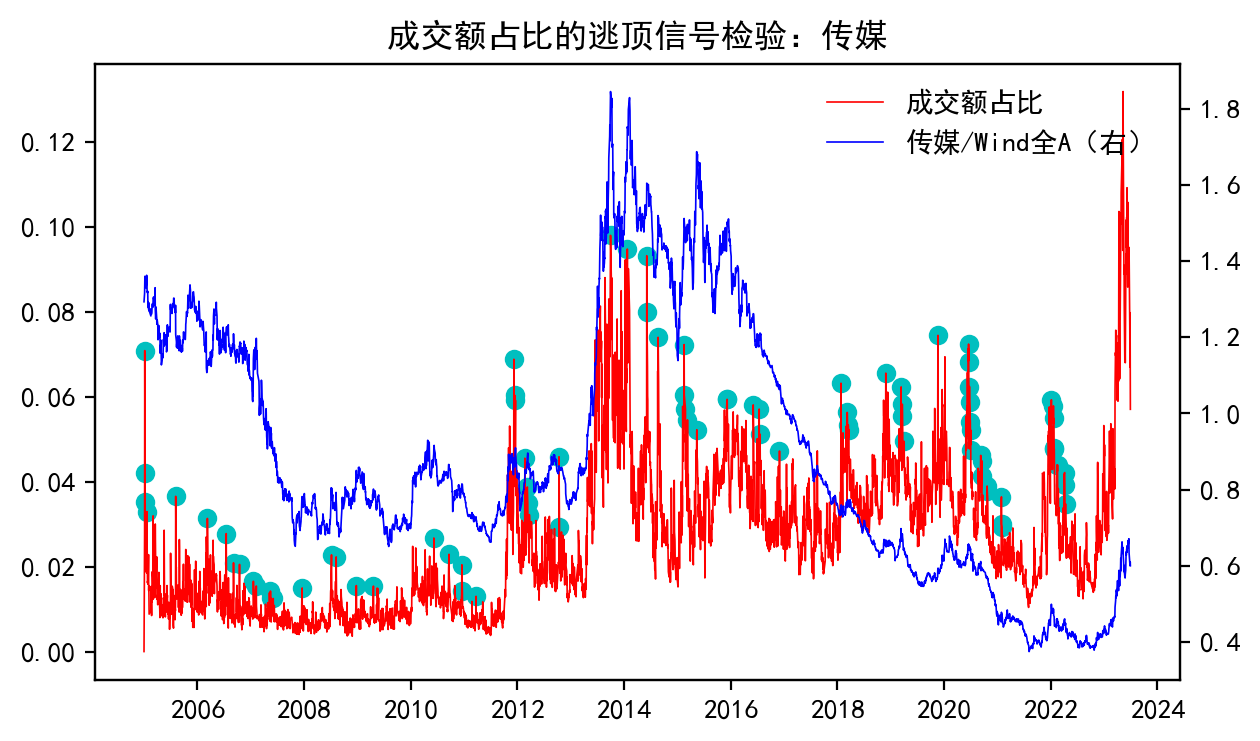

In [15]:
# 逃顶示意图
fig=plt.figure(figsize=(7,4),dpi=200)        
ax1=fig.add_subplot(111)                     
line1,=ax1.plot(times,percent,'r',lw=0.6,label='成交额占比') 
plt.scatter(timetake_max, ratemax, s=None, c='c', marker=None, cmap=None)
ax2=ax1.twinx()                           
line2,=ax2.plot(times,trend,'b',lw=0.6,label='传媒/Wind全A')
plt.legend((line1,line2),('成交额占比','传媒/Wind全A（右）'),frameon=False,framealpha=0.5)       
#ax1.set_xlabel('时间')                # 设置x轴
#ax1.set_ylabel('%')                   # 设置左侧y轴
#ax2.set_ylabel('%')                  # 设置右侧y轴
plt.title("成交额占比的逃顶信号检验：传媒")                    # 设置图的名称
#plt.savefig('传媒-逃顶.png')                                   # 保存输出图片
plt.show()